In [1]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1.0/255.0,  # Rescale pixel values to [0, 1]
    validation_split=0.2  # Split data into training and validation sets
)

In [3]:

# Load and preprocess the dataset
train_generator = datagen.flow_from_directory(
    r"C:\Users\Tejas\Downloads\archive (5)\chest_xray\train",
    target_size=(224, 224),  # Xception requires input size of (224, 224)
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 4173 images belonging to 2 classes.


In [4]:

validation_generator = datagen.flow_from_directory(
    r"C:\Users\Tejas\Downloads\archive (5)\chest_xray\val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2 images belonging to 2 classes.


In [5]:
# Load and preprocess the dataset for testing
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\Tejas\Downloads\archive (5)\chest_xray\test",  # Replace with the path to your testing dataset directory
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 624 images belonging to 2 classes.


In [6]:
base_model = Xception(weights='imagenet', include_top=False)

In [7]:
labels = train_generator.class_indices
with open('class_labels.txt', 'w') as file:
    file.write("[")
    for l in labels:
        file.write(f"{l}, ")
    file.write("]")

In [8]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
outputs = Dense(train_generator.num_classes, activation='softmax')(x)

In [9]:
# Create the final model
model = Model(inputs=base_model.input, outputs=outputs)


In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, None, None, 32)       128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, None, None, 32)       0         ['block1_conv1_bn[0][0]'] 

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Train the model
EPOCHS = 5
# history = model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator)
history = model.fit(train_generator, epochs=EPOCHS)

Epoch 1/5
131/131 [==============================] - 1269s 10s/step - loss: 0.2110 - accuracy: 0.9209
Epoch 2/5
131/131 [==============================] - 1249s 10s/step - loss: 0.1292 - accuracy: 0.9576
Epoch 3/5
131/131 [==============================] - 1330s 10s/step - loss: 0.0996 - accuracy: 0.9665
Epoch 4/5
131/131 [==============================] - 873s 7s/step - loss: 0.0969 - accuracy: 0.9662
Epoch 5/5
131/131 [==============================] - 860s 7s/step - loss: 0.0864 - accuracy: 0.9698


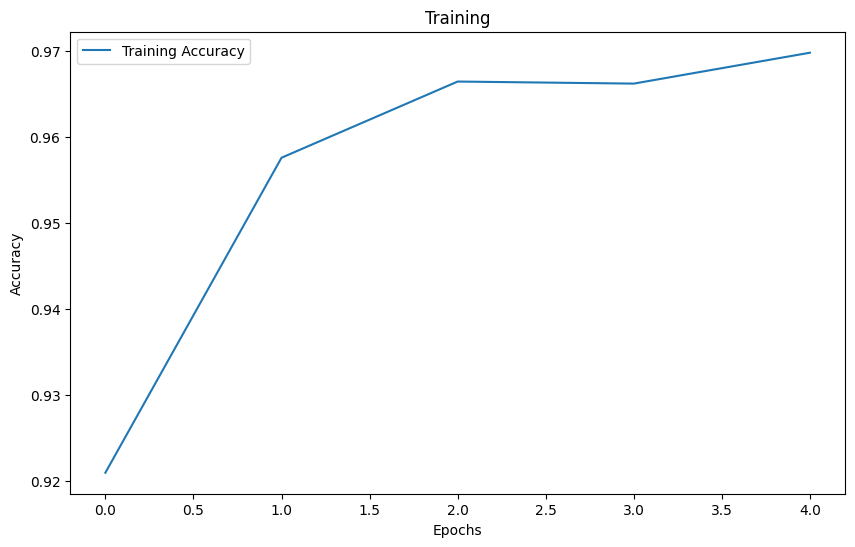

In [13]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.title('Training and Validation Accuracy')
plt.title('Training')
plt.show()

In [14]:
# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


20/20 [==============================] - 24s 1s/step - loss: 0.3396 - accuracy: 0.8333
Test Loss: 0.3395675718784332, Test Accuracy: 0.8333333134651184


In [15]:
# Save the model for future use
model.save(r"C:\Users\Tejas\OneDrive\Desktop\T_work\1. Projects\xception.h5")

c:\Users\Tejas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
